In [458]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import datetime

import seaborn as sns
import statistics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [459]:
with open('ultimate_data_challenge.json') as file:
    data1 = json.load(file)

In [460]:
df = pd.DataFrame(data1)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [461]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [462]:
col = df.columns.tolist
col

<bound method IndexOpsMixin.tolist of Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')>

In [463]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


## DATA WRANGLING

In [464]:
len(df)

50000

In [465]:
df = df.drop( df[df.avg_rating_by_driver.isna()==True].index, axis=0 )
len(df)/50000

0.99598

In [466]:
df = df.drop( df[df.avg_rating_of_driver.isna()==True].index, axis=0 )
len(df)/50000

0.83488

In [467]:
df = df.drop( df[df.avg_surge.isna()==True].index, axis=0 )
len(df)/50000

0.83488

In [468]:
df = df.drop( df[df.surge_pct.isna()==True].index, axis=0 )
len(df)/50000

0.83488

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
city                      41744 non-null object
last_trip_date            41744 non-null object
phone                     41445 non-null object
signup_date               41744 non-null object
surge_pct                 41744 non-null float64
trips_in_first_30_days    41744 non-null int64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.9+ MB


In [470]:
df1 = df[ df['signup_date']>= "2014-01-07"]
len(df1)/50000

0.69016

In [471]:
df11 = df1[ df1['last_trip_date'] <= "2014-02-07"]
len(df11)/50000

0.14138

In [472]:
fraction_retained = len(df11)/len(df1)
fraction_retained 

0.2048510490321085

In [473]:
df22 = df1[ df1["last_trip_date"]>"2014-02-07"]
len(df22)/50000

0.54878

#### df11 is the group who took rides within 30 days after sign up on Jan 07, 2014
#### df22 is the group who did not take a ride within 30 days after sign up on Jan 07, 2014

In [474]:
city_Y = df11["city"].value_counts()/df11["city"].value_counts().sum()
city_Y

Winterfell        0.482105
Astapor           0.379969
King's Landing    0.137926
Name: city, dtype: float64

In [475]:
city_N = df22["city"].value_counts()/df22["city"].value_counts().sum()
city_N

Winterfell        0.441962
Astapor           0.317978
King's Landing    0.240060
Name: city, dtype: float64

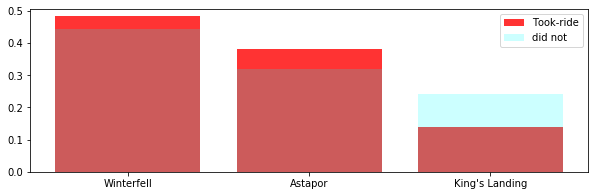

In [476]:
plt.figure(figsize=(10,3))
plt.bar(city_Y.index, city_Y.values, label="Took-ride", color='red', alpha=0.8)
plt.bar(city_N.index, city_N.values, label="did not", color='cyan', alpha=0.2)
plt.legend()
plt.show()

In [477]:
phone_Y = df11['phone'].value_counts()/df11['phone'].value_counts().sum()
phone_Y

iPhone     0.610968
Android    0.389032
Name: phone, dtype: float64

In [478]:
phone_N = df22['phone'].value_counts()/df22['phone'].value_counts().sum()
phone_N

iPhone     0.728807
Android    0.271193
Name: phone, dtype: float64

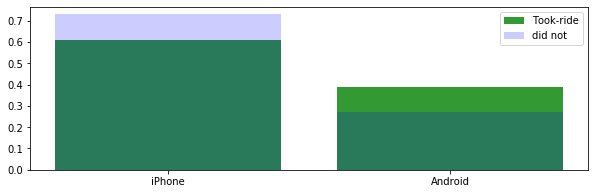

In [479]:
plt.figure(figsize=(10,3))
plt.bar(phone_Y.index, phone_Y.values, label="Took-ride", color='green', alpha=0.8)
plt.bar(phone_N.index, phone_N.values, label="did not", color='blue', alpha=0.2)
plt.legend()
plt.show()

### Modeling 

In [480]:
from datetime import timedelta
import calendar

In [481]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [482]:
df['active'] = df['last_trip_date'] - df['signup_date'] > timedelta(150)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [483]:
df['active'] = df['active'].astype(int)
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,5.465312,4.776648,4.601801,1.073697,8.884695,2.611393,61.304437,0.271057
std,5.149810,0.404109,0.616079,0.198681,18.309042,4.060121,34.799944,0.444511
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000,0.000000
50%,3.790000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [484]:
df1 = df.drop(['signup_date', 'last_trip_date'], axis=1)

In [485]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [486]:
y = df1['active']
X = df1.drop(['active'], axis=1)

In [487]:
X.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [488]:
df2 = pd.get_dummies(X, columns=['city', 'phone', 'ultimate_black_user'])
df2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,5.465312,4.776648,4.601801,1.073697,8.884695,2.611393,61.304437,0.325795,0.211503,0.462701,0.289694,0.703143,0.614388,0.385612
std,5.149810,0.404109,0.616079,0.198681,18.309042,4.060121,34.799944,0.468677,0.408379,0.498613,0.453626,0.456878,0.486745,0.486745
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.790000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [489]:
df2.describe().columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [490]:
cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'city_Astapor',
       "city_King's Landing", 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True']

In [491]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [492]:
std_sca = StandardScaler()
x = std_sca.fit_transform(df2) 

In [493]:
np.shape(x), np.shape(y)

((41744, 14), (41744,))

#### DecisionTreesClassifier   

In [494]:
from sklearn.model_selection import train_test_split
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=0.40, random_state=100)

In [495]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [496]:
clf = DecisionTreeClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
Accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("Accuracy : ", str(Accuracy), ", ROC score : ", str(roc))

Accuracy :  0.6964905976763685 , ROC score :  0.6208814922872181


In [497]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     12140
           1       0.45      0.45      0.45      4558

   micro avg       0.70      0.70      0.70     16698
   macro avg       0.62      0.62      0.62     16698
weighted avg       0.70      0.70      0.70     16698



#### ExtraTreesClassifier

In [498]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("Accuracy : ", str(accuracy), " ROC score : ", str(roc))

Accuracy :  0.7366151634926339  ROC score :  0.626278632424262


In [499]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12140
           1       0.52      0.38      0.44      4558

   micro avg       0.74      0.74      0.74     16698
   macro avg       0.66      0.63      0.64     16698
weighted avg       0.72      0.74      0.72     16698



#### LogisticRegression

In [500]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
roc = roc_auc_score(y_t, y_p)
accuracy = accuracy_score(y_t, y_p)
print(" Accuracy : ", str(accuracy), ", ROC score : ", str(roc))

 Accuracy :  0.7410468319559229 , ROC score :  0.5743805268792564


In [503]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77     12140
           1       0.46      0.63      0.53      4558

   micro avg       0.69      0.69      0.69     16698
   macro avg       0.65      0.67      0.65     16698
weighted avg       0.73      0.69      0.71     16698



#### GaussianNB

In [504]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t) 
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("Accuracy : ", str(accuracy), ", ROC score : ", str(roc))

Accuracy :  0.6949335249730507 , ROC score :  0.6745510003592718


In [505]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77     12140
           1       0.46      0.63      0.53      4558

   micro avg       0.69      0.69      0.69     16698
   macro avg       0.65      0.67      0.65     16698
weighted avg       0.73      0.69      0.71     16698



#### SVC

In [506]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
roc = roc_auc_score(y_t, y_p)
accuracy = accuracy_score(y_t, y_p)

In [507]:
print("Accuracy : ", str(accuracy), ", ROC score : ", str(roc))

Accuracy :  0.7582345191040843 , ROC score :  0.6173049828930143


In [508]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     12140
           1       0.61      0.31      0.41      4558

   micro avg       0.76      0.76      0.76     16698
   macro avg       0.70      0.62      0.63     16698
weighted avg       0.74      0.76      0.73     16698



#### GridSearchCV

In [509]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],
             'gamma': [1, 0.1],
             }

svc_param = GridSearchCV(estimator= svc, param_grid=param_grid, cv=5)
svc_param

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10], 'gamma': [1, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [510]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 

In [ ]:
svc_param.fit(x_tr, y_tr)
y_p = svc.predict(x_t)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("Accuarcy : ", str(accuracy), ", ROC score : ", str(roc))

In [ ]:
print(classification_report)